### IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from numpy import log
from pmdarima import auto_arima
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

### LOAD DATA & DATA EXPLORATION

In [2]:
df = pd.read_csv('Alcohol_Sales.csv')
df.head()

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221


In [3]:
df.rename({"S4248SM144NCEN": "Alcohol_Sales","DATE": "Time"}, axis=1, inplace=True)
df['Time'] = pd.to_datetime(df['Time'])

In [4]:
df.set_index('Time', inplace=True)
df.head()

,Alcohol_Sales
Time,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [5]:
df.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01',
               '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01',
               '2018-12-01', '2019-01-01'],
              dtype='datetime64[ns]', name='Time', length=325, freq=None)

In [6]:
df.iloc[0]

Alcohol_Sales    3459
Name: 1992-01-01 00:00:00, dtype: int64

In [7]:
df.iloc[-1]

Alcohol_Sales    10718
Name: 2019-01-01 00:00:00, dtype: int64

In [8]:
df.describe()

,Alcohol_Sales
count,325.000000
mean,7886.400000
std,2914.269061
min,3031.000000
25%,5231.000000
50%,7481.000000
75%,9977.000000
max,15504.000000


### STATIONARITY VERIFY

#### ORIGINAL DATASET

In [9]:
result = adfuller(df.Alcohol_Sales.dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: 2.037405
p-value: 0.998720


#### CAUSE IDENTIFICATION FOR HIGH P-VALUE (TREND)

In [10]:
dfarima = df['Alcohol_Sales'] - df['Alcohol_Sales'].rolling(12).mean()

In [11]:
result = adfuller(dfarima.dropna())
print('ADF Statistics: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistics: -3.968880
p-value: 0.001583


### PLOT & STUDY OF DATASET FOR ARIMA & SARIMAX VALUES

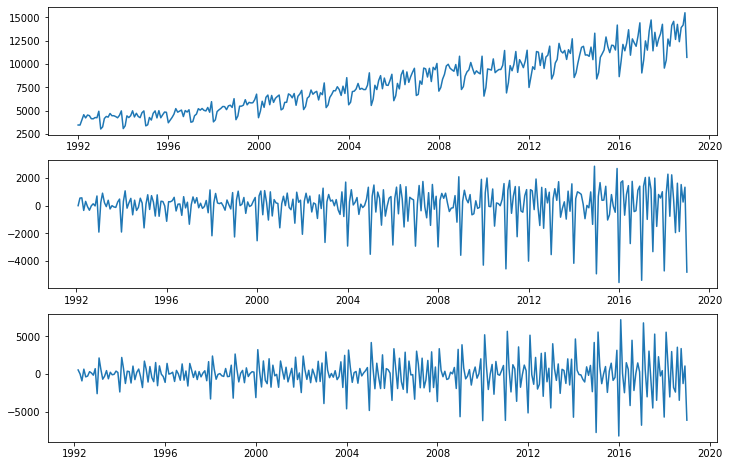

In [12]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(3, 1, 1)
ax1.plot(df.Alcohol_Sales)

ax2 = fig.add_subplot(3, 1, 2)
ax2.plot(df.Alcohol_Sales.diff().dropna())

ax3 = fig.add_subplot(3, 1, 3)
ax3.plot(df.Alcohol_Sales.diff().diff().dropna())

plt.show()

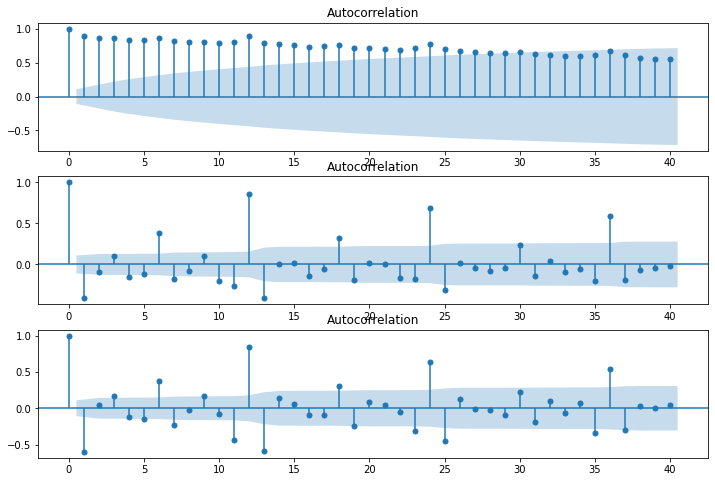

In [13]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(3, 1, 1)
fig = sm.graphics.tsa.plot_acf(df['Alcohol_Sales'][1:], lags=40, ax=ax1)

ax2 = fig.add_subplot(3, 1, 2)
fig = sm.graphics.tsa.plot_acf(df['Alcohol_Sales'].diff().dropna()[1:], lags=40, ax=ax2)

ax3 = fig.add_subplot(3, 1, 3)
fig = sm.graphics.tsa.plot_acf(df['Alcohol_Sales'].diff().diff().dropna()[1:], lags=40, ax=ax3)

plt.show()

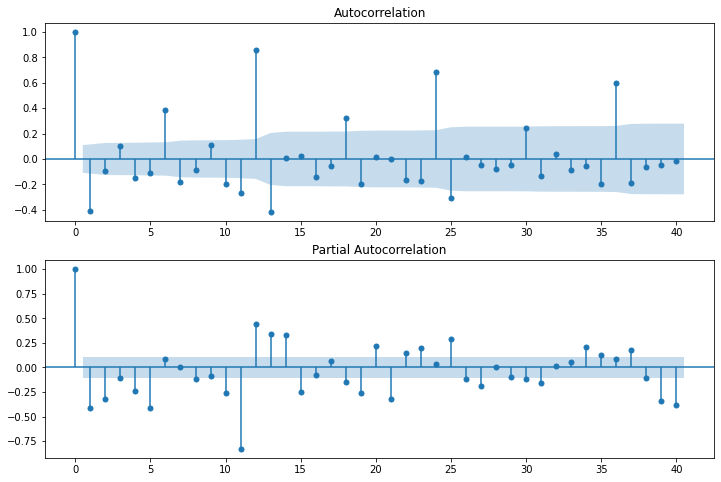

In [14]:
fig = plt.figure(figsize=(12, 8))

ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['Alcohol_Sales'].diff()[1:], lags=40, ax=ax1) 

ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['Alcohol_Sales'].diff()[1:], lags=40, ax=ax2)

In [15]:
warnings.filterwarnings("ignore")

### AUTOMATIC ALGORITM THAT CONFIRM VALUES FOR ARIMA & SARIMAX

In [16]:
stwpwise_fit = auto_arima(df['Alcohol_Sales'], trace=True, suppress_warnings=True)
stwpwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5581.852, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5521.140, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5399.757, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5579.946, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5400.180, Time=0.25 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5399.909, Time=0.31 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5427.084, Time=0.05 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 1.683 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  325
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2696.878
Date:                Thu, 23 Jun 2022   AIC                           5399.757
Time:                        22:22:31   BIC                           5411.099
Sample:                             0   HQIC                          5404.284
                                - 325                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.1224      2.588     11.252      0.000      24.050      34.195
ma.L1         -0.9598      0.018    -53.911      0.000      -0.995      -0.925
sigma2      9.822e+05   6.74e+04     14.578      0.000     8.5e+05    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                19.75
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### ARIMA MODEL FIT

In [17]:
model = ARIMA(df.Alcohol_Sales, order=(0, 1, 1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.Alcohol_Sales   No. Observations:                  324
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -2695.820
Method:                       css-mle   S.D. of innovations            989.970
Date:                Thu, 23 Jun 2022   AIC                           5397.639
Time:                        22:22:31   BIC                           5408.982
Sample:                    02-01-1992   HQIC                          5402.167
                         - 01-01-2019                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    28.8602      2.549     11.322      0.000      23.864      33.856
ma.L1.D.Alcohol_Sales    -0.9570      0.015    -62.817      0.000      -0.987      -0.927
        

### PLOT RESIDUAL ERRORS & VALUES DISTRIBUTION

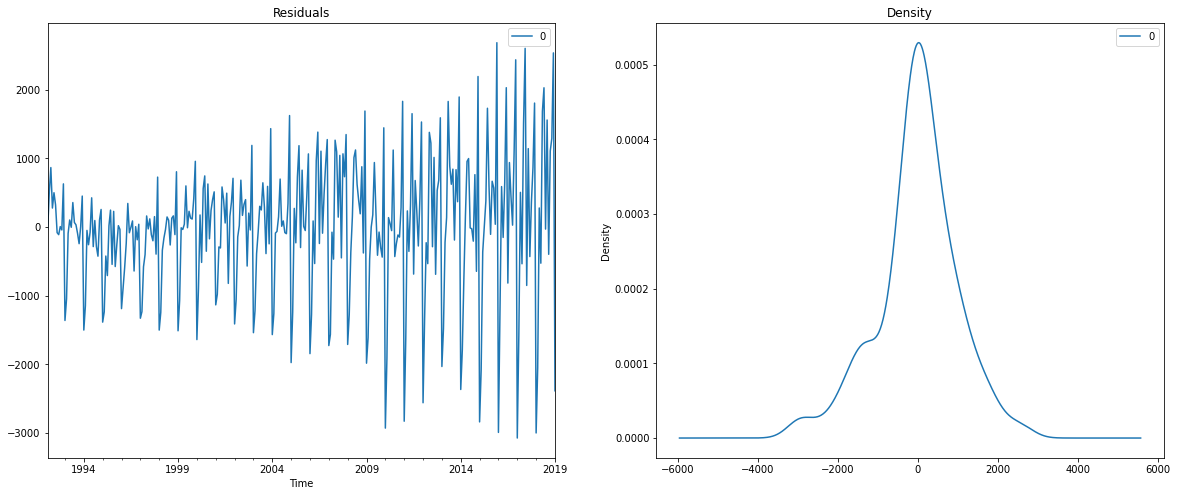

In [18]:
residuals = pd.DataFrame(model_fit.resid)
fig = plt.figure(figsize=(20, 8))
ax = fig.subplots(1, 2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

### ACTUAL VS FITTED (ARIMA HAS NO SEASONAL VALUE)

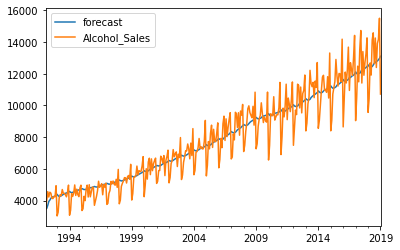

In [19]:
model_fit.plot_predict(dynamic=False)
plt.show()

### SEPARATION OF MEAN & STD

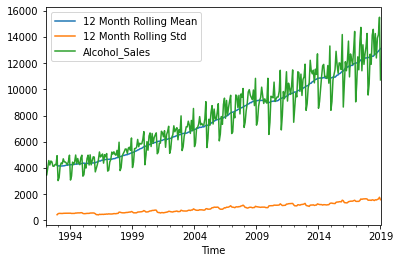

In [20]:
df['Alcohol_Sales'].rolling(12).mean().plot(label='12 Month Rolling Mean')
df['Alcohol_Sales'].rolling(12).std().plot(label='12 Month Rolling Std')
df['Alcohol_Sales'].plot()
plt.legend()

### PLOT TREND - SEASONAL - RESID

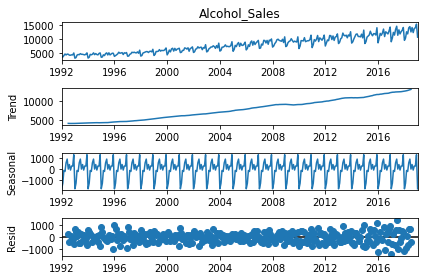

In [21]:
decomp = seasonal_decompose(df['Alcohol_Sales'], freq=12)
fig = decomp.plot()

### CREATION OF TRAIN DATASET & TEST DATASET

In [22]:
train = df.Alcohol_Sales[:240]
test = df.Alcohol_Sales[240:]
print("Train:"+str(len(train))+"    "+"Test:"+str(len(test)))

Train:240    Test:85


In [23]:
train.index

DatetimeIndex(['1992-01-01', '1992-02-01', '1992-03-01', '1992-04-01',
               '1992-05-01', '1992-06-01', '1992-07-01', '1992-08-01',
               '1992-09-01', '1992-10-01',
               ...
               '2011-03-01', '2011-04-01', '2011-05-01', '2011-06-01',
               '2011-07-01', '2011-08-01', '2011-09-01', '2011-10-01',
               '2011-11-01', '2011-12-01'],
              dtype='datetime64[ns]', name='Time', length=240, freq=None)

### SARIMAX PREDICTION

<AxesSubplot:xlabel='Time'>

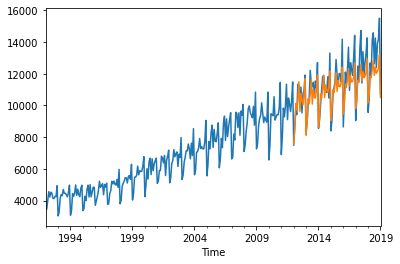

In [24]:
model = sm.tsa.statespace.SARIMAX(train, order=(0, 1, 1), seasonal_order=(1, 1, 1, 12))
fitted = model.fit()

df['forecast'] = fitted.predict(start=240, end=325, dynamic=True)
df['Alcohol_Sales'].plot()
df['forecast'].plot()

In [25]:
# forecast_accuracy(fc,test.values)
# model.plot_diagnostics(figsize=(7,5))